In [9]:
with open('data/names.txt', 'r') as f:
  words = f.read().splitlines()

In [10]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [11]:
len(words)

32033

In [19]:
b = {}
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    bigram = (ch1, ch2)
    b[bigram] = b.get(bigram, 0) + 1
    #print(ch1, ch2)

In [ ]:
sorted(b.items(), key=lambda kv: -kv[1])

In [27]:
import torch

In [37]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [45]:
chars = sorted(set(''.join(words)))
s_to_i = {s: i for i, s in enumerate(chars)}
s_to_i['<S>'] = 26
s_to_i['<E>'] = 27

In [55]:
i_to_s = {i: s for s, i in s_to_i.items()}

In [46]:
for w in words:
  chs = ['<S>'] + list(w) + ['<E>']
  for ch1, ch2 in zip(chs, chs[1:]):
    x1, x2 = s_to_i[ch1], s_to_i[ch2]
    N[x1, x2] += 1
    #b[bigram] = b.get(bigram, 0) + 1
    #print(ch1, ch2)

In [49]:
import matplotlib.pyplot as plt
%matplotlib inline

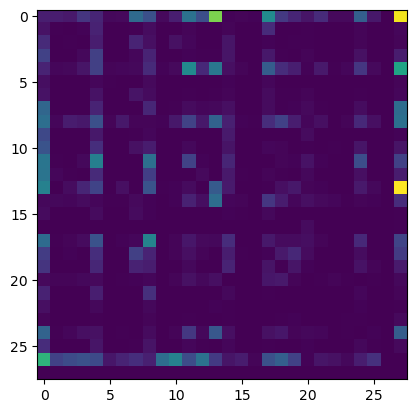

In [51]:
plt.imshow(N)

In [ ]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(28):
  for j in range(28):
    chstr = i_to_s[i] + i_to_s[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='green')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')

In [ ]:
N

In [60]:
N = torch.zeros((28, 28), dtype=torch.int32)

chars = sorted(set(''.join(words)))
s_to_i = {s : i+1 for i, s in enumerate(chars)}
s_to_i['.'] = 0


i_to_s = {i: s for s, i in s_to_i.items()}

In [61]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    x1, x2 = s_to_i[ch1], s_to_i[ch2]
    N[x1, x2] += 1

(-0.5, 27.5, 27.5, -0.5)

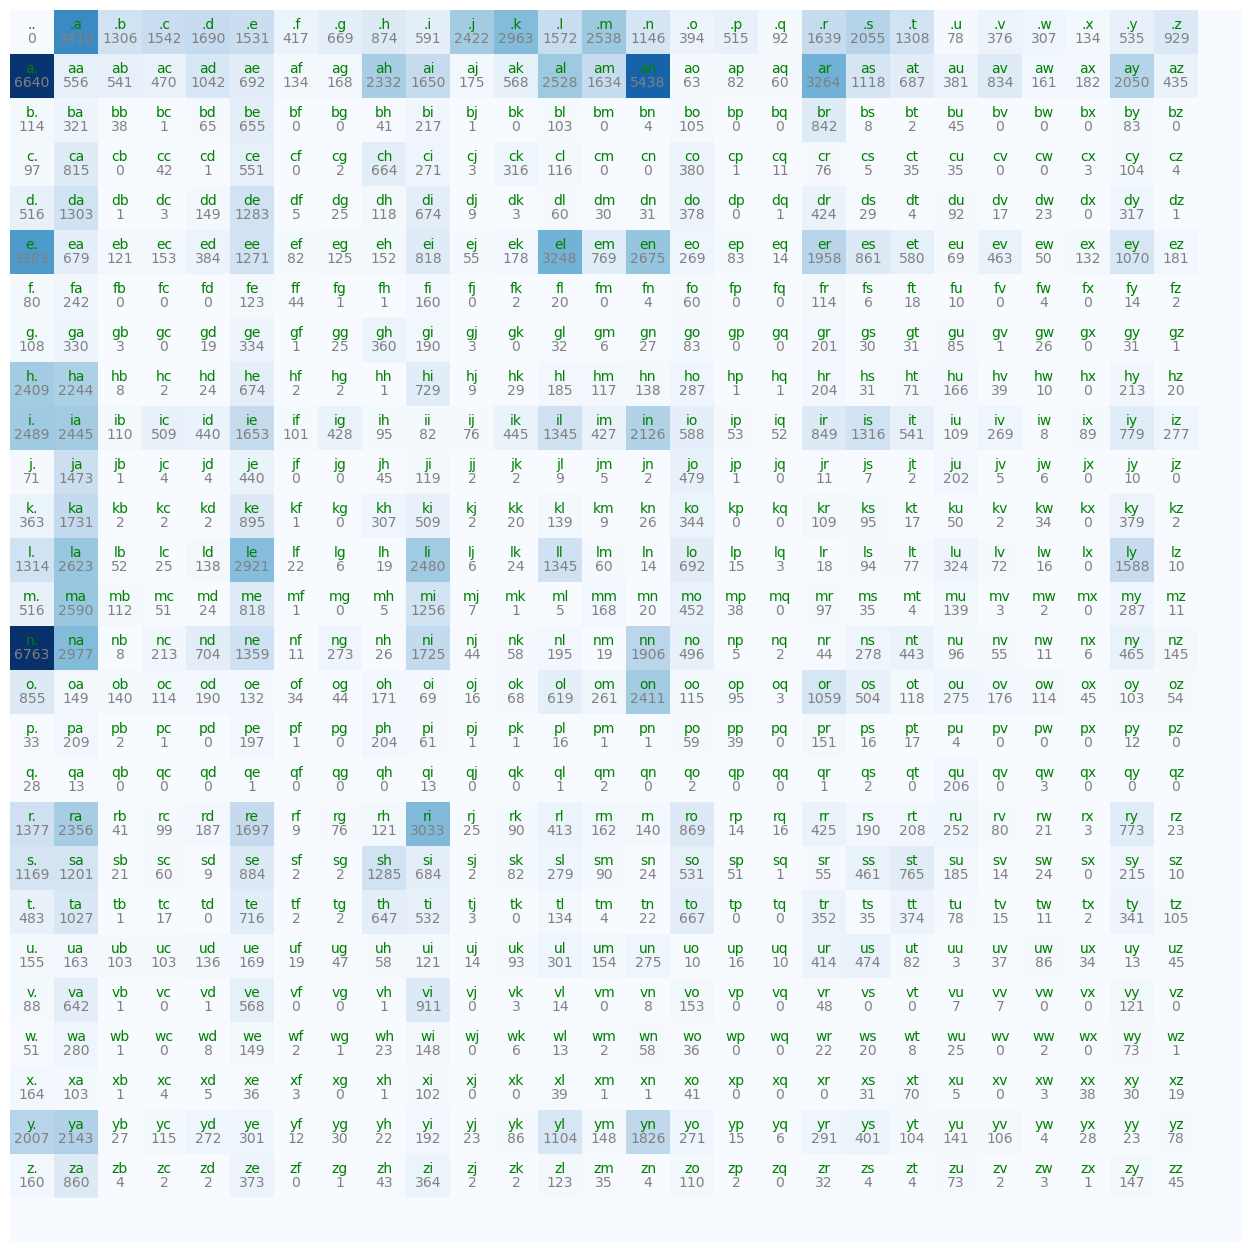

In [62]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap="Blues")
for i in range(27):
  for j in range(27):
    chstr = i_to_s[i] + i_to_s[j]
    plt.text(j, i, chstr, ha='center', va='bottom', color='green')
    plt.text(j, i, N[i, j].item(), ha='center', va='top', color='gray')
plt.axis('off')